In [28]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import emoji

In [29]:
# Load chat data from text file
def load_whatsapp_chat(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        chat_lines = file.readlines()

    # Define regex to parse each line
    pattern = r'(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}\s[APM]{2}) - (.*?): (.*)'

    # Initialize lists to store parsed data
    dates, times, senders, messages = [], [], [], []

    for line in chat_lines:
        match = re.match(pattern, line)
        if match:
            dates.append(match.group(1))
            times.append(match.group(2))
            senders.append(match.group(3))
            messages.append(match.group(4))

    # Create a DataFrame
    chat_df = pd.DataFrame({
        'date': dates,
        'time': times,
        'sender': senders,
        'message': messages
    })

    return chat_df


# Load the data
file_path = "WhatsApp Chat data.txt"
chat_df = load_whatsapp_chat(file_path)

# Drop any rows with NaN values in the message column
chat_df = chat_df.dropna(subset=['message'])

chat_df = chat_df[chat_df['message'] != "<Media omitted>"]

chat_df.head(5)

,date,time,sender,message
0,12/24/23,5:15 AM,Alice,I've been feeling really overwhelmed lately. I...
1,12/24/23,5:16 AM,Bob,"I totally get it, Alice. Sometimes it feels li..."
2,12/24/23,5:17 AM,Charlie,"Honestly, I feel so lost. It's hard to see a w..."
3,12/24/23,5:18 AM,Dana,I'm just tired of pretending everything's okay...
4,12/24/23,5:19 AM,Alice,I think I’m starting to feel the effects of al...


In [30]:
#download required nltk libbraries
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize the lemmatizer and stop words list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def extract_emojis(text):
    # Extract emojis from the text
    return ''.join(char for char in text if char in emoji.EMOJI_DATA)

# Define a function to normalize each message
def preprocess_message(message):
    if pd.isna(message):
        return ""  # Return an empty string or handle as needed
    
    emojis = extract_emojis(message)
    # Tokenize the message
    words = word_tokenize(message.lower())  # Convert to lowercase and tokenize
    
    # Remove stop words and apply lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    
    # Rejoin the lemmatized words into a single string
    return " ".join(lemmatized_words) + " " + emojis



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\theje\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\theje\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theje\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\theje\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define keywords related to mental health or emotions
relevant_keywords = ["feel", "think", "anxious", "happy", "sad", "overwhelm", 
                     "stress", "lonely", "angry", "depression", "worry","depress","alone","bad"]

general_emotions = [
    "unhappy", "miserable", "disappointed", "discouraged", "discontent", 
    "upset", "lost", "hopeless", "helpless", "hurt", "emotionally drained", 
    "insecure", "worthless", "apathetic", "disheartened", "emotionally tired", 
    "low", "blue", "unmotivated", "burnt out", "defeated", "empty", 
    "exhausted", "fatigued", "overworked", "broken", "numb", "vulnerable", 
    "self-critical", "self-doubt", "self-blame", "self-conscious", "wounded", 
    "fragile", "suffering", "unloved", "alone", "forsaken", "abandoned", 
    "unimportant", "insignificant", "trapped", "isolated", "rejected", 
    "excluded", "victimized", "mistreated", "marginalized", "paranoid", 
    "suffocated", "claustrophobic", "melancholy", "devastated", "tortured", 
    "struggling", "downhearted", "low-spirited", "under pressure", "fearful", 
    "scared", "nervous", "tense", "on edge", "panicky", "agitated", 
    "uneasy", "distressed", "frustrated", "irritable", "overwhelmed", 
    "restless", "moody", "guilty", "ashamed", "regretful", "humiliated", 
    "annoyed", "bitter", "resentful", "spiteful", "enraged", "irritated", 
    "mad", "furious", "infuriated", "fed up", "pessimistic", "overthinking", 
    "hypercritical", "critical", "overanalyzing"
]

depression_related = [
    "no purpose", "no direction", "dead inside", "empty", 
    "worthless", "burden", "too much to handle", "lost hope", 
    "no way out", "can't continue", "sick of this", "hate myself", 
    "better off alone", "hate my life", "worn out", "nothing matters", 
    "numb inside", "hollow", "pointless", "no meaning", 
    "life is meaningless", "no escape", "stuck in darkness", 
    "lifeless", "heavy-hearted", "weary", "emotionally dead", 
    "emotionally numb", "withdrawn", "losing interest", 
    "can’t cope", "can’t function", "not good enough", "dissatisfied", 
    "sick of myself", "can't stand myself", "let everyone down", 
    "disappointed in myself", "self-hate", "always failing", "broken-hearted", 
    "no joy", "void", "endless struggle", "struggle to get by", 
    "exhausted by life", "chronic fatigue", "drowning in sorrow", 
    "can’t keep going", "paralyzed by sadness", "barely surviving"
]


suicidal_thoughts = [
    "better off dead", "no reason to live", "end it all", "want to die","i have no use in this world","why do i have to live?","kill me","want to get killed"
    "nothing left", "no point in living", "can't go on", 
    "want to disappear", "need an escape", "thinking of ending it", 
    "no one would miss me", "wish I was gone", "world without me", 
    "giving up on life", "tired of everything", "dark thoughts", 
    "end the pain", "like dying", "want the pain to stop", 
    "no purpose in life", "just want to rest", "better if I wasn’t here", 
    "can’t take it anymore", "ready to give up", "final exit", 
    "thinking of ways to end it", "planning to leave", 
    "nobody understands", "want to vanish", "fade away", 
    "no one would care", "no more pain", "leave this world", 
    "thoughts of death", "embracing death", "at the edge", 
    "don’t want to be here", "tired of living", "give up on everything", 
    "lost the will", "overwhelming darkness", "life is too painful", 
    "too much suffering", "no reason to stay", "reaching the end", 
    "feeling suicidal", "losing my grip", "can't find relief", 
    "want the suffering to end", "had enough of life", 
    "thinking about death", "ready to leave it all", "end it all", 
    "no one will notice", "can’t hold on", "falling apart"
]

trauma_related = [
    "flashbacks", "reliving memories", "nightmares", "horrible dreams", 
    "can't escape memories", "haunted by past", "traumatized", 
    "triggered", "reliving trauma", "afraid of reminders", 
    "stuck in the past", "unbearable memories", "avoidance", 
    "feeling detached", "emotionally numb", "outbursts", 
    "always on guard", "irritable", "survivor guilt", 
    "self-isolation", "trust issues", "feeling tainted", 
    "afraid to talk", "frozen in fear", "haunted by past events", 
    "can’t forget", "disturbed sleep", "sleep problems", 
    "feeling unsafe", "afraid to trust", "reliving the nightmare", 
    "emotional pain", "feeling contaminated", "paralyzed by past", 
    "fear of intimacy", "feel ruined", "feeling broken", 
    "intrusive thoughts", "hypervigilant", "unable to rest", 
    "afraid of closeness", "feeling worthless", "feeling numb","fall apart","falling apart"
]

anxiety_related = [
    "anxious", "nervous", "scared", "worried", "uneasy", "stressed", 
    "panic attack", "overthinking", "feeling tense", "on edge", 
    "restless", "fearful", "terrified", "can't calm down", "racing thoughts", 
    "fear of failure", "fear of judgment", "fear of rejection", 
    "dreading", "paranoid", "insecure", "feeling inadequate", 
    "social anxiety", "butterflies in stomach", "feeling small", 
    "out of control", "fear of the future", "impending doom", 
    "stomach in knots", "racing heart", "sweaty palms", "afraid to speak", 
    "overwhelmed by pressure", "pressure to succeed", "perfectionist", 
    "performance anxiety", "stressed out", "mentally paralyzed", 
    "hypersensitive", "worried about everything", "always panicking", 
    "distrustful", "fear of the unknown", "always looking over shoulder", 
    "can’t relax", "always cautious", "fight or flight", 
    "mentally exhausted", "worn down", "tired of pretending", 
    "expecting the worst", "always worried", "fear of being hurt"
]

emotion_emojis = {
    "happy": ["😊", "😂", "😄", "😁", "😆", "😅", "🙂", "😎", "😍","🥳","🤗"],
    "sad": ["😔", "😢", "😭", "😞", "😿"],
    "angry": ["😠", "😡", "😤"],
    "anxious": ["😰", "😥", "😓", "😨"],
    "frustrated": ["😖", "😣", "😫"],
    "love": ["❤️", "💕", "😍"],
    'surprise': ['😲', '😮', '😱']
}

    
# Flatten emoji list for easy checking
relevant_emojis = [emoji for emojis in emotion_emojis.values() for emoji in emojis]
# Function to check if a message is relevant
def is_relevant_message(message):
    # Check for keywords in the message
    if any(word in message.lower() for word in relevant_keywords):
        return True
    if any(word in message.lower() for word in general_emotions):
        return True
    if any(word in message.lower() for word in anxiety_related):
        return True
    if any(word in message.lower() for word in depression_related):
        return True
    if any(word in message.lower() for word in suicidal_thoughts):
        return True
    if any(word in message.lower() for word in trauma_related):
        return True
    
     # Calculate sentiment score
    sentiment_score = analyzer.polarity_scores(message)['compound']
     # Check for relevant emojis
    if any(char in message for char in relevant_emojis):
        return True
    
    # Calculate sentiment score
    sentiment_score = analyzer.polarity_scores(message)['compound']
    # Check for strong sentiment (positive or negative)
    if sentiment_score >= 0.3 or sentiment_score <= -0.4:
        return True
    
    return False



In [35]:
# Lists of words for linguistic marker categories
self_focus_words = ["i", "me", "my", "myself", "mine"]
positive_emotion_words = ["happy", "joy", "love", "excited", "grateful", "good", "perfect", "cheerful", "hopeful", "delighted", "proud", "thrilled", "content", "blessed", "amazing", "wonderful", "fantastic", "fabulous", "inspired", "pleased", "elated", "thankful", "exciting", "satisfied", "radiant", "vibrant", "eager",
    "happy", "happiness", 
    "love", "loving", "loveliness", 
    "excite", "excitement", 
    "appreciate", "appreciation", 
    "thank", "thankfulness", 
    "satisfy", "satisfaction", 
    "enjoy", "enjoyment", 
    "relax", "relaxation", 
    "hope", "hopefulness", 
    "inspire", "inspiration", 
    "motivate", "motivation", 
    "celebrate", "celebration", 
    "cheer", "cheerfulness", 
    "smile", "smile", 
    "gratitude", "gratefulness", 
    "proud", "pride", 
    "trust", "trustworthiness", 
    "kind", "kindness", 
    "exciting", "excitedness", 
    "content", "contentment", 
    "care", "caring", 
    "warm", "warmth"
    "better"
]
negative_emotion_words = [
    "sadden", "sadness", 
    "anger", "angry", 
    "depress", "depression", 
    "upset", "upset", 
    "anxious", "anxiety", 
    "worry", "worry", 
    "frustrate", "frustration", 
    "disappoint", "disappointment", 
    "lonely", "loneliness", 
    "hurt", "hurt", 
    "fear", "fear", 
    "guilt", "guilt", 
    "overwhelm", "overwhelm", 
    "jealous", "jealousy", 
    "hope", "hopelessness", 
    "nervous", "nervousness", 
    "stress", "stress", 
    "bore", "boredom", 
    "embarrass", "embarrassment", 
    "shame", "shame", 
    "fatigue", "fatigue", 
    "agitate", "agitation", 
    "irritate", "irritation", 
    "regret", "regret", 
    "dismay", "dismay", 
    "unhappy", "unhappiness"
    "sad", "angry", "depressed", "upset", "anxious", "worried", "frustrated", "disappointed", "lonely", "hurt", "fearful", "guilty", "overwhelmed", "jealous", "hopeless", "nervous", "stressed", "bored", "embarrassed", "ashamed", "fatigued", "agitated", "irritated", "regretful", "dismal", "unhappy"
]

cognitive_distortion_words = ["always", "never", "everyone", "no one", "perfect", "horrible"]


# Apply the preprocessing to the 'message' column
chat_df['processed_message'] = chat_df['message'].apply(preprocess_message)

# Apply the filtering function
chat_df['is_relevant'] = chat_df['processed_message'].apply(is_relevant_message)

# Filter to get only relevant messages
messages_df = chat_df[chat_df['is_relevant']]




# Helper function to calculate the presence or frequency of keywords
def count_keywords(message, keyword_list):
    tokens = word_tokenize(message.lower())
    return sum(1 for word in tokens if word in keyword_list)

# Calculate average sentence length (number of words per sentence)
def avg_sentence_length(message):
    sentences = message.split(".")
    words_per_sentence = [len(word_tokenize(sentence)) for sentence in sentences if sentence]
    return sum(words_per_sentence) / len(words_per_sentence) if words_per_sentence else 0



# # Feature Engineering
# Calculate sentiment using TextBlob and assign it safely to the DataFrame
messages_df.loc[:, 'sentiment'] = messages_df['processed_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Ensure the date and time columns are in the right format with explicit format specification
messages_df.loc[:, 'datetime'] = pd.to_datetime(
    messages_df['date'] + ' ' + messages_df['time'], 
    format='%m/%d/%y %I:%M %p', 
    errors='coerce'  # Use 'coerce' to handle any parsing errors
)

# Similarly update other assignments to avoid SettingWithCopyWarning
messages_df.loc[:, 'mental_health_keywords'] = messages_df['processed_message'].apply(lambda x: count_keywords(x, self_focus_words + positive_emotion_words + negative_emotion_words + cognitive_distortion_words))
messages_df.loc[:, 'self_focus_count'] = messages_df['processed_message'].apply(lambda x: count_keywords(x, self_focus_words))
messages_df.loc[:, 'positive_emotion_count'] = messages_df['processed_message'].apply(lambda x: count_keywords(x, positive_emotion_words))
messages_df.loc[:, 'negative_emotion_count'] = messages_df['processed_message'].apply(lambda x: count_keywords(x, negative_emotion_words))
messages_df.loc[:, 'cognitive_distortion_count'] = messages_df['processed_message'].apply(lambda x: count_keywords(x, cognitive_distortion_words))
messages_df.loc[:, 'avg_sentence_length'] = messages_df['message'].apply(avg_sentence_length)
messages_df.loc[:,'suicide_words_count'] = messages_df['processed_message'].apply(lambda x: count_keywords(x,suicidal_thoughts))
messages_df.loc[:,'trauma_words_count'] = messages_df['processed_message'].apply(lambda x: count_keywords(x,trauma_related))

# Calculate engagement features
messages_df.loc[:,'time_diff'] = messages_df['datetime'].diff().dt.total_seconds()
messages_df.loc[:,'message_length'] = messages_df['message'].apply(len)
messages_df.loc[:,'total_emotion_words'] = messages_df['positive_emotion_count'] + messages_df['negative_emotion_count']
messages_df.loc[:,'negativity_ratio'] = messages_df['negative_emotion_count'] / (messages_df['total_emotion_words'] + 1e-5)


# Rolling average of sentiment over a 5-message window
messages_df.loc[:,'sentiment_rolling_avg'] = messages_df['sentiment'].rolling(window=5).mean()

# Function to count emoji categories
def count_emoji_categories(message):
    emoji_count = {category: 0 for category in emotion_emojis}
    for emoji_category, emojis in emotion_emojis.items():
        emoji_count[emoji_category] = sum(message.count(emo) for emo in emojis)
    return emoji_count

# Example modification in the data preparation
emoji_counts = messages_df['processed_message'].apply(count_emoji_categories)
emoji_counts_df = pd.DataFrame(emoji_counts.tolist())
messages_df = pd.concat([messages_df, emoji_counts_df], axis=1)
messages_df.drop(columns=['is_relevant','mental_health_keywords'], inplace=True)
messages_df = messages_df.dropna()
messages_df.head(30)

C:\Users\theje\AppData\Local\Temp\ipykernel_21244\2249376279.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages_df.loc[:, 'sentiment'] = messages_df['processed_message'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\theje\AppData\Local\Temp\ipykernel_21244\2249376279.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages_df.loc[:, 'datetime'] = pd.to_datetime(
C:\Users\theje\AppData\Local\Temp\ipykernel_21244\2249376279.py:98: SettingWithCopyWarning: 
A value is trying to be set

,date,time,sender,message,processed_message,sentiment,datetime,self_focus_count,positive_emotion_count,negative_emotion_count,...,total_emotion_words,negativity_ratio,sentiment_rolling_avg,happy,sad,angry,anxious,frustrated,love,surprise
4,12/24/23,5:19 AM,Alice,I think I’m starting to feel the effects of al...,think starting feel effect stress affecting sl...,0.000000,2023-12-24 05:19:00,0.0,0.0,1.0,...,1.0,0.999990,0.030833,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12/24/23,5:20 AM,Bob,Same here! I keep having nightmares about fail...,keep nightmare failing exhausting 😱,-0.400000,2023-12-24 05:20:00,0.0,0.0,0.0,...,0.0,0.000000,-0.039167,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,12/24/23,5:21 AM,Charlie,We should plan a day to just relax and recharg...,plan day relax recharge could really help u 🌈,0.200000,2023-12-24 05:21:00,0.0,1.0,0.0,...,1.0,0.000000,0.000833,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,12/24/23,5:22 AM,Dana,"That sounds good, but I feel guilty taking tim...",sound good feel guilty taking time much 😩,0.200000,2023-12-24 05:22:00,0.0,1.0,1.0,...,2.0,0.499998,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,12/24/23,5:23 AM,Alice,It’s okay to take breaks. We’re not machines! 💖,okay take break machine 💖,0.500000,2023-12-24 05:23:00,0.0,0.0,0.0,...,0.0,0.000000,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,12/24/23,5:24 AM,Bob,"I often feel like I'm not good enough, especia...",often feel like good enough especially compare...,0.233333,2023-12-24 05:24:00,0.0,1.0,0.0,...,1.0,0.000000,0.146667,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,12/24/23,5:25 AM,Charlie,I think we all struggle with that. It’s hard t...,think struggle hard see worth sometimes 🤷♂,0.004167,2023-12-24 05:25:00,0.0,0.0,0.0,...,0.0,0.000000,0.227500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,12/24/23,5:26 AM,Dana,I’m scared of failing and disappointing everyo...,scared failing disappointing everyone feel lik...,-0.600000,2023-12-24 05:26:00,0.0,0.0,0.0,...,0.0,0.000000,0.067500,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,12/24/23,5:27 AM,Alice,"I know how you feel, Dana. Sometimes, I think ...",know feel dana sometimes think giving 😞,0.000000,2023-12-24 05:27:00,0.0,0.0,0.0,...,0.0,0.000000,0.027500,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13,12/24/23,5:28 AM,Bob,Please don’t say that! You matter more than yo...,please say matter think 💪,0.000000,2023-12-24 05:28:00,0.0,0.0,0.0,...,0.0,0.000000,-0.072500,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
print(messages_df.columns)

Index(['date', 'time', 'sender', 'message', 'processed_message', 'sentiment',
       'datetime', 'self_focus_count', 'positive_emotion_count',
       'negative_emotion_count', 'cognitive_distortion_count',
       'avg_sentence_length', 'suicide_words_count', 'trauma_words_count',
       'time_diff', 'message_length', 'total_emotion_words',
       'negativity_ratio', 'sentiment_rolling_avg', 'happy', 'sad', 'angry',
       'anxious', 'frustrated', 'love', 'surprise'],
      dtype='object')


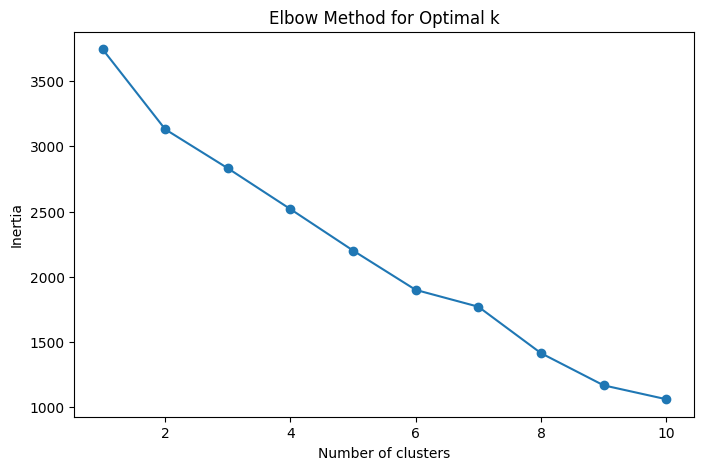

                                              message  cluster
4   I think I’m starting to feel the effects of al...        1
5   Same here! I keep having nightmares about fail...        3
6   We should plan a day to just relax and recharg...        2
7   That sounds good, but I feel guilty taking tim...        1
8     It’s okay to take breaks. We’re not machines! 💖        0
9   I often feel like I'm not good enough, especia...        5
10  I think we all struggle with that. It’s hard t...        0
11  I’m scared of failing and disappointing everyo...        0
12  I know how you feel, Dana. Sometimes, I think ...        5
13  Please don’t say that! You matter more than yo...        0
14  Let’s focus on small wins. Maybe sharing our g...        0
15  I’m all in for that! I need to feel like I’m m...        0
16  My goal this week is to practice self-care and...        1
17  Love that, Alice! I’ll work on managing my anx...        1
19  We can do this! Just remember, it’s okay to as...  

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
features = messages_df[['sentiment', 'self_focus_count', 
                                        'happy', 'sad', 'angry', 
                                        'anxious', 'frustrated', 
                                        'love', 'surprise',
                                        'message_length', 
                                        'positive_emotion_count', 'negative_emotion_count','cognitive_distortion_count',
                                        'negativity_ratio',
                                        'time_diff','suicide_words_count','trauma_words_count']]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters (Elbow Method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k 
optimal_k = 6 # Change based on elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
messages_df['cluster'] = kmeans.fit_predict(scaled_features)

# Preview the clusters
print(messages_df[['message', 'cluster']].head(20))


In [41]:
# Remove classes with fewer than 2 samples
min_class_size = 2
classes_to_keep = class_counts[class_counts >= min_class_size].index
filtered_df = messages_df[messages_df['cluster'].isin(classes_to_keep)]

X = filtered_df.drop(columns=['cluster'])
y = filtered_df['cluster']

# Proceed with the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Separate features
text_data = messages_df['processed_message']
engagement_data = messages_df[['self_focus_count', 'positive_emotion_count', 'negative_emotion_count', 
                                 'cognitive_distortion_count', 'avg_sentence_length', 'suicide_words_count', 
                                 'trauma_words_count', 'time_diff', 'message_length', 'total_emotion_words', 
                                 'negativity_ratio', 'sentiment_rolling_avg', 'happy', 'sad', 
                                 'angry', 'anxious', 'frustrated', 'love', 'surprise']]

# Train-test split
X_train_text, X_test_text, X_train_engagement, X_test_engagement = train_test_split(
    text_data, engagement_data, test_size=0.3, random_state=42
)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize text data
def tokenize_text(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')

X_train_text_tokenized = [tokenize_text(text) for text in X_train_text]
X_test_text_tokenized = [tokenize_text(text) for text in X_test_text]


c:\Users\theje\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\theje\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
